In [198]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# Time
import time
import math

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

In [199]:
# Question 4
# Part A
def stagpressureratio(M,gamma):
    return (1+(((gamma-1)/2)*(M**2)))**(gamma/(gamma-1))

In [200]:
# Part B
print(" M Value | Pressure Ratio")
gamma = 1.4
M = np.arange(0,2.2,.2)
ratios = np.zeros((11,1))
for i in range(0,11):
    ratios[i] = stagpressureratio(M[i],gamma)
    print("     %1.1f |          %1.3f "%(M[i],ratios[i]))

 M Value | Pressure Ratio
     0.0 |          1.000 
     0.2 |          1.028 
     0.4 |          1.117 
     0.6 |          1.276 
     0.8 |          1.524 
     1.0 |          1.893 
     1.2 |          2.425 
     1.4 |          3.182 
     1.6 |          4.250 
     1.8 |          5.746 
     2.0 |          7.824 


In [201]:
# Part C
linearcoeffs = t.polyFit(M,ratios,1)
quadcoeffs = t.polyFit(M,ratios,2)
cubiccoeffs = t.polyFit(M,ratios,3)
print("The linear approximation for the generated data: ")
print("y = %2.3fx + %2.3f"%(linearcoeffs[1],linearcoeffs[0]))
print("The quadratic approximation for the generated data: ")
print("y = %2.3fx^2 + %2.3fx + %2.3f"%(quadcoeffs[2],quadcoeffs[1],quadcoeffs[0]))
print("The cubic approximation for the generated data: ")
print("y = %2.3fx^3 + %2.3fx^2 + %2.3fx + %2.3f"%(cubiccoeffs[3],cubiccoeffs[2],cubiccoeffs[1],cubiccoeffs[0]))

The linear approximation for the generated data: 
y = 3.050x + -0.208
The quadratic approximation for the generated data: 
y = 2.518x^2 + -1.986x + 1.303
The cubic approximation for the generated data: 
y = 1.239x^3 + -1.198x^2 + 0.848x + 0.946


In [202]:
# Part D
Mtest = 1.35
linearapprox = linearcoeffs[1]*Mtest + linearcoeffs[0]
quadapprox = quadcoeffs[2]*(Mtest**2) + quadcoeffs[1]*Mtest + quadcoeffs[0]
cubicapprox = cubiccoeffs[3]*(Mtest**3) + cubiccoeffs[2]*(Mtest**2) + cubiccoeffs[1]*Mtest + cubiccoeffs[0]
print("Using the linear approximation, the ratio for an M value of 1.35 is: %5.4f"%(linearapprox))
print("Using the quadratic approximation, the ratio for an M value of 1.35 is: %5.4f"%(quadapprox))
print("Using the cubic approximation, the ratio for an M value of 1.35 is: %5.4f"%(cubicapprox))

Using the linear approximation, the ratio for an M value of 1.35 is: 3.9099
Using the quadratic approximation, the ratio for an M value of 1.35 is: 3.2111
Using the cubic approximation, the ratio for an M value of 1.35 is: 2.9556


In [203]:
# Part E
actualM = stagpressureratio(1.35,1.4)
print("The actual value for the ratio for an M value of 1.35 is: %5.4f"%(actualM))

The actual value for the ratio for an M value of 1.35 is: 2.9676


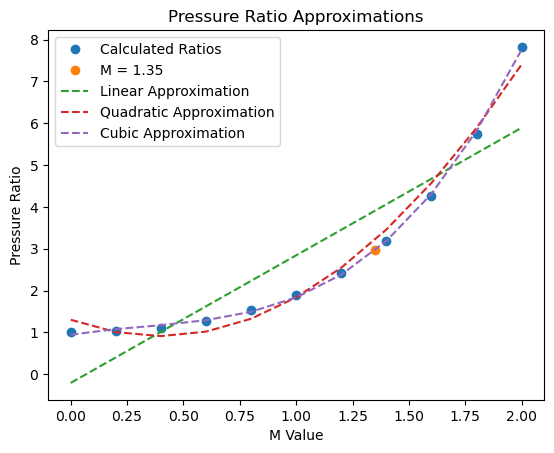

In [204]:
# Visual Representation
y1 = t.returnPoly(M,linearcoeffs)
y2 = t.returnPoly(M,quadcoeffs)
y3 = t.returnPoly(M,cubiccoeffs)
plt.plot(M,ratios,'o',1.35,actualM,'o',M,y1,'--',M,y2,'--',M,y3,'--')
plt.xlabel('M Value')
plt.ylabel('Pressure Ratio')
plt.title('Pressure Ratio Approximations')
plt.legend(['Calculated Ratios','M = 1.35','Linear Approximation','Quadratic Approximation','Cubic Approximation'])
plt.show()

Both with the chart and comparing the values, the Cubic Approximation appears to be the best approximation of M = 1.35. This is due to the greater accuracy allowed for by the greater number of coefficients. The data does not follow a linear path, therefore a linear approximation will only be accurate at 2 points (assuming that the trend present in the data holds true to infinity). The quadratic matches the data closer, however the data does not follow a parabolic path, therefore a quadratic cannot match the data. A cubic can follow this path much more closely due to the change in direction (slope never goes negative, will become less positive then more positive), which can follow the more linear trend of the data below .5.